In [2]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot
from datetime import datetime
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

dow = pd.read_csv("data_gathering/data/DJI.csv")
btc = pd.read_csv("data_gathering/data/BTC.csv")

In [3]:
from IPython.display import HTML
plotly.tools.set_credentials_file(username="AndyVu-Hoang", api_key="9Ut7brZV1YJ1eDk0aNyw")

In [4]:
dow.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/1/2013,14839.79981,14839.79981,14687.04981,14700.95020,14700.95020,112620000
1,5/2/2013,14700.95020,14834.62988,14700.95020,14831.58008,14831.58008,91180000
2,5/3/2013,14831.58008,15009.58984,14831.58008,14973.95996,14973.95996,119890000
3,5/6/2013,14973.95996,14988.87012,14941.08984,14968.88965,14968.88965,116160000
4,5/7/2013,14968.88965,15056.66992,14968.88965,15056.20020,15056.20020,117230000


In [5]:
btc.tail()

,Date,BITSTAMP,COINBASE,ITBIT,KRAKEN,avg_btc_price_usd,price_usd
2400,4/9/2018,6839.423990,6854.045507,6883.028037,6844.344700,6855.210559,6855.210559
2401,4/10/2018,6786.642319,6791.874050,6779.679059,6780.155652,6784.587770,6784.587770
2402,4/11/2018,6894.958433,6893.791740,6886.717021,6887.136386,6890.650895,6890.650895
2403,4/12/2018,7548.015149,7546.063852,7476.781733,7542.264352,7528.281271,7528.281271
2404,4/13/2018,8035.266915,7998.148796,8016.838673,8003.545154,8013.449884,8013.449884


In [6]:
# the dates are in different formats
# converting to datetime
dow['Date'] = pd.to_datetime(dow['Date'])
btc['Date'] = pd.to_datetime(btc['Date'])

In [7]:
btc_ts = btc[['price_usd']]
btc_ts.index = btc['Date']

In [8]:
btc_ts.index

DatetimeIndex(['2011-09-13', '2011-09-14', '2011-09-15', '2011-09-16',
               '2011-09-17', '2011-09-18', '2011-09-19', '2011-09-20',
               '2011-09-21', '2011-09-22',
               ...
               '2018-04-04', '2018-04-05', '2018-04-06', '2018-04-07',
               '2018-04-08', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13'],
              dtype='datetime64[ns]', name='Date', length=2405, freq=None)

In [9]:
btc_ts.price_usd

Date
2011-09-13       5.929231
2011-09-14       5.590798
2011-09-15       5.094272
2011-09-16       4.854515
2011-09-17       4.870000
2011-09-18       4.839576
2011-09-19       4.900000
2011-09-20       5.388054
2011-09-21       5.706075
2011-09-22       5.696960
2011-09-23       5.707099
2011-09-24       5.722494
2011-09-25       6.050000
2011-09-26       5.983073
2011-09-27       4.895402
2011-09-28       4.862498
2011-09-29       4.816345
2011-09-30            NaN
2011-10-01            NaN
2011-10-02            NaN
2011-10-03       4.847772
2011-10-04       4.924737
2011-10-05       5.029419
2011-10-06       4.908846
2011-10-07       4.687629
2011-10-08       4.455536
2011-10-09       3.890000
2011-10-10       4.498302
2011-10-11       3.998965
2011-10-12       3.943964
                 ...     
2018-03-15    8067.795078
2018-03-16    8301.331495
2018-03-17    8039.581190
2018-03-18    7670.518666
2018-03-19    8383.159592
2018-03-20    8687.915179
2018-03-21    8965.557594
2018-03

In [10]:
py.iplot([go.Scatter(x=btc_ts.index, y=btc_ts.price_usd)])


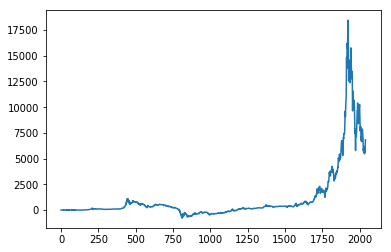

In [11]:
# there is clearly an increasing trend for the price of bitcoin
# checking for seasonality
X = btc_ts.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i-days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

In [12]:
# checking if certain months have better average prices for the year
btc_ts.index.month
month_avgs = []
for i in range(2012, 2019):
    months = list()
    for j in range(1,13):
        m_y = btc_ts[btc_ts.index.year==i]
        m = m_y[m_y.index.month==j]
        if(len(m.price_usd)!=0):
            avg = sum(m.price_usd)/len(m.price_usd)
            months.append(avg)
        else:
            months.append(0)
    month_avgs.append({'Year': i, 'January': months[0], 'February': months[1], 'March': months[2],
                      'April': months[3], 'May': months[4], 'June': months[5], 'July': months[6],
                      'August': months[7], 'September': months[8], 'October': months[9], 
                      'November': months[10], 'December': months[11]})

In [13]:
month_avgs = pd.DataFrame(month_avgs)

In [14]:
month_avgs.drop('Year', axis=1).rank(axis=1)

,April,August,December,February,January,July,June,March,May,November,October,September
0,2.0,8.0,12.0,4.0,6.0,7.0,5.0,1.0,3.0,9.0,11.0,10.0
1,9.0,5.0,12.0,2.0,1.0,4.0,6.0,3.0,7.0,11.0,10.0,8.0
2,5.0,7.0,1.0,11.0,12.0,10.0,9.0,8.0,6.0,3.0,2.0,4.0
3,3.0,7.0,12.0,1.0,6.0,10.0,5.0,9.0,4.0,11.0,8.0,2.0
4,4.0,6.0,12.0,1.0,2.0,10.0,8.0,3.0,5.0,11.0,9.0,7.0
5,4.0,8.0,12.0,2.0,1.0,6.0,7.0,3.0,5.0,11.0,10.0,9.0
6,9.0,4.5,4.5,11.0,12.0,4.5,4.5,10.0,4.5,4.5,4.5,4.5


Months that are later on in the year, such as October/November/December, seem to have higher rank. Although this is likely just due to the increasing trend of cryptocurrency.

In [15]:
month_avgs

,April,August,December,February,January,July,June,March,May,November,October,September,Year
0,4.965896,10.873603,13.135257,5.253617,6.210285,7.775188,5.961872,4.948944,5.042166,11.302019,11.580728,11.400267,2012
1,125.647351,103.386922,791.966258,25.741707,15.311842,85.356419,105.074970,56.956316,117.089728,524.572121,152.340199,124.629855,2013
2,463.320172,536.095398,343.271350,665.321186,821.757334,617.308501,614.445771,597.555200,483.792634,366.008265,364.137785,445.736664,2014
3,235.054794,252.569366,422.163076,233.167626,251.840768,279.640755,237.378826,268.402124,236.779634,347.978013,264.736040,233.892409,2015
4,433.844826,579.044451,821.156849,401.935362,411.403763,661.299670,639.400484,414.765630,460.487036,724.210465,640.967599,604.362367,2016
5,1212.385282,3836.256386,14904.144063,1059.535756,909.061716,2495.321295,2607.779323,1127.333906,1882.554626,7753.708621,5297.857584,4089.788818,2017
6,7031.768318,0.000000,0.000000,9360.001801,12854.472549,0.000000,0.000000,8992.810651,0.000000,0.000000,0.000000,0.000000,2018


In [18]:
btc_ts[btc_ts.price_usd.isnull()].index

DatetimeIndex(['2011-09-30', '2011-10-01', '2011-10-02', '2011-10-15',
               '2011-10-16', '2011-10-18', '2011-10-19', '2011-10-22',
               '2011-10-23', '2011-10-27', '2011-11-02', '2011-11-03',
               '2011-11-07', '2011-11-23', '2011-11-27', '2011-12-04',
               '2011-12-09', '2011-12-17'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [19]:
btc_cut = btc_ts['2011-12-18':]
acf(btc_cut)

array([ 1.        ,  0.99679247,  0.99307827,  0.98953657,  0.98605033,
        0.98255523,  0.97895901,  0.97527755,  0.97185687,  0.96809137,
        0.96395094,  0.95923697,  0.95475814,  0.95053666,  0.94651878,
        0.9428067 ,  0.9390996 ,  0.93548895,  0.93189407,  0.9279289 ,
        0.9234024 ,  0.91809045,  0.912693  ,  0.90729108,  0.90172922,
        0.89654926,  0.89133913,  0.88617515,  0.88123057,  0.87616004,
        0.87136987,  0.86650126,  0.86171683,  0.85699435,  0.85202901,
        0.84721981,  0.84274153,  0.83823562,  0.83367568,  0.82864369,
        0.82312447])

In [20]:
pacf(btc_cut)

array([ 1.        ,  0.99722436, -0.09330179,  0.03774939,  0.00147494,
       -0.00363265, -0.01964294, -0.01428683,  0.04697442, -0.07562667,
       -0.05479902, -0.10056511,  0.05550801,  0.02656214,  0.03168895,
        0.05822281, -0.010901  ,  0.02216898, -0.00962994, -0.05065683,
       -0.09284669, -0.13924025, -0.01778043, -0.03241142, -0.03720235,
        0.07353075, -0.00972054,  0.02517318,  0.05233205,  0.01433784,
        0.08693747, -0.01902226,  0.01035001, -0.03133096, -0.08079014,
       -0.00632502,  0.03668701, -0.01800585, -0.01335134, -0.05504004,
       -0.06933721])

Here, I will be trying to perform a time series analysis on the cryptocurrency prices.

In [21]:
py.iplot([go.Scatter(x=btc_ts.index, y=btc_ts.price_usd)])

In [22]:
# since there is a clear increasing trend, i want to try looking at the differenced data
def difference(data, lag=1):
    diff = list()
    for i in range(lag, len(data)):
        x = data[i] - data[i-lag]
        diff.append(x)
    return(pd.Series(diff))

In [33]:
# checking latest index where there is NaN value 
np.argwhere(np.isnan(btc_ts.price_usd))

array([[17],
       [18],
       [19],
       [32],
       [33],
       [35],
       [36],
       [39],
       [40],
       [44],
       [50],
       [51],
       [55],
       [71],
       [75],
       [82],
       [87],
       [95]], dtype=int64)

In [36]:
# for the time series analysis, I will exclude the last 100 data points in order to use for verification
# also excluding data points before latest NaN value
btc_d1 = difference(btc_ts.price_usd[96:(len(btc_ts.price_usd)-100)])

In [39]:
# checking variances to see how much I should difference, ideal differencing should always reduce variance
np.var(btc_ts.price_usd)

7851376.959159912

In [41]:
# variance of differencing weekly
np.var(difference(btc_ts.price_usd[96:(len(btc_ts.price_usd)-100)], lag=7))

182658.64057719806

In [43]:
# variance of differencing monthly
np.var(difference(btc_ts.price_usd[96:(len(btc_ts.price_usd)-100)], lag=30))

974530.2193823421

In [44]:
# differencing yearly
np.var(difference(btc_ts.price_usd[96:(len(btc_ts.price_usd)-100)], lag=365))

4931242.369738594

In [46]:
# daily differencing
np.var(btc_d1)

19229.63311301812

In [51]:
# differencing again
np.var(difference(btc_d1, lag=1))

32299.126232821738

In [27]:
py.iplot([go.Scatter(x=btc_d1.index, y=btc_d1)])